In [253]:
from bs4 import BeautifulSoup,Comment
import urllib.request
import pandas as pd
import requests
import numpy as np
import matplotlib.pyplot as plt

In [81]:
#to get soup for 2020 team offense using Comment, used below
url = "https://www.pro-football-reference.com/years/2020/"
soup = BeautifulSoup(requests.get(url).content, 'html.parser')
table = soup.select_one('#all_team_stats').find_next(text=lambda t: isinstance(t, Comment))
table = BeautifulSoup(table, 'html.parser')



In [246]:
#what the HTML looks like
table.prettify()[0:2500]

'<div class="table_container" id="div_team_stats">\n <table class="per_match_toggle sortable stats_table" data-cols-to-freeze=",2" id="team_stats">\n  <caption>\n   Team Offense Table\n  </caption>\n  <colgroup>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n   <col/>\n  </colgroup>\n  <thead>\n   <tr class="over_header">\n    <th aria-label="" class="over_header center" colspan="2" data-stat="">\n    </th>\n    <th>\n    </th>\n    <th>\n    </th>\n    <th>\n    </th>\n    <th aria-label="" class="over_header center" colspan="3" data-stat="header_tot_off_tgl">\n     Tot Yds &amp; TO\n    </th>\n    <th>\n    </th>\n    <th>\n    </th>\n    <th aria-label="" class="over_header center" colspan="7" data-stat="header_pass">\n     Passing\n   

In [124]:
#function to rename some columns and columns that are missing titles from HTML table
def rename_cols(df):
    dict = {'Unnamed: 0_level_0':'TotOff',
            'Unnamed: 1_level_0':'TotOff',
            'Unnamed: 2_level_0':'TotOff',
            'Unnamed: 3_level_0':'TotOff',
            'Unnamed: 4_level_0':'TotOff',
            'Tot Yds & TO':'TotOff',
            'Tot Yds & TO':'TotOff',
            'Tot Yds & TO':'TotOff',
            'Unnamed: 8_level_0':'TotOff',
            'Unnamed: 9_level_0':'TotOff',
            'Unnamed: 25_level_0':'Score%',
            'Unnamed: 26_level_0':'TurnOver%',
            'Unnamed: 27_level_0':'EXP',}
        
    # call rename() method
    df.rename(columns=dict,inplace=True)
    return(df)


In [236]:
#for loop to get data for X years


year = 2020
#URL for website data
url = "https://www.pro-football-reference.com/years/"
urls = []
OFFdfs = []
for index in np.arange(10):
    #create URL for BeautifulSoup
    urls.append(url + str(year - index) +'/')
    years = year - index


for index in urls:
    soup = BeautifulSoup(requests.get(index).content, 'html.parser')
    table = soup.select_one('#all_team_stats').find_next(text=lambda t: isinstance(t, Comment))
    table = BeautifulSoup(table, 'html.parser')    
    #create DF from html table, drop last 3 rows of data 
    OFFdfs.append(pd.read_html(str(table))[0].drop(df.index[-3:]))

for index in np.arange(10):
    #add Year to DF columns
    curr_year = year - index
    OFFdfs[index]['Year'] = curr_year

#initialize Master Team Offense Dataframe    
MasterOFF = OFFdfs[0]

for i in range(len(OFFdfs)-1):    
    #append DF to master, reset index to continuous
    MasterOFF = MasterOFF.append(OFFdfs[i+1],ignore_index = True)

#rename columns to useful index    
MasterOFF = rename_cols(MasterOFF)



In [237]:
MasterOFF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320 entries, 0 to 319
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   (TotOff, Rk)        320 non-null    float64
 1   (TotOff, Tm)        320 non-null    object 
 2   (TotOff, G)         320 non-null    float64
 3   (TotOff, PF)        320 non-null    float64
 4   (TotOff, Yds)       320 non-null    float64
 5   (TotOff, Ply)       320 non-null    float64
 6   (TotOff, Y/P)       320 non-null    float64
 7   (TotOff, TO)        320 non-null    float64
 8   (TotOff, FL)        320 non-null    float64
 9   (TotOff, 1stD)      320 non-null    float64
 10  (Passing, Cmp)      320 non-null    float64
 11  (Passing, Att)      320 non-null    float64
 12  (Passing, Yds)      320 non-null    float64
 13  (Passing, TD)       320 non-null    float64
 14  (Passing, Int)      320 non-null    float64
 15  (Passing, NY/A)     320 non-null    float64
 16  (Passing

In [268]:
MasterOFF.keys()

MultiIndex([(   'TotOff',    'Rk'),
            (   'TotOff',    'Tm'),
            (   'TotOff',     'G'),
            (   'TotOff',    'PF'),
            (   'TotOff',   'Yds'),
            (   'TotOff',   'Ply'),
            (   'TotOff',   'Y/P'),
            (   'TotOff',    'TO'),
            (   'TotOff',    'FL'),
            (   'TotOff',  '1stD'),
            (  'Passing',   'Cmp'),
            (  'Passing',   'Att'),
            (  'Passing',   'Yds'),
            (  'Passing',    'TD'),
            (  'Passing',   'Int'),
            (  'Passing',  'NY/A'),
            (  'Passing',  '1stD'),
            (  'Rushing',   'Att'),
            (  'Rushing',   'Yds'),
            (  'Rushing',    'TD'),
            (  'Rushing',   'Y/A'),
            (  'Rushing',  '1stD'),
            ('Penalties',   'Pen'),
            ('Penalties',   'Yds'),
            ('Penalties', '1stPy'),
            (   'Score%',   'Sc%'),
            ('TurnOver%',   'TO%'),
            (      'EXP',   

<Figure size 720x720 with 0 Axes>

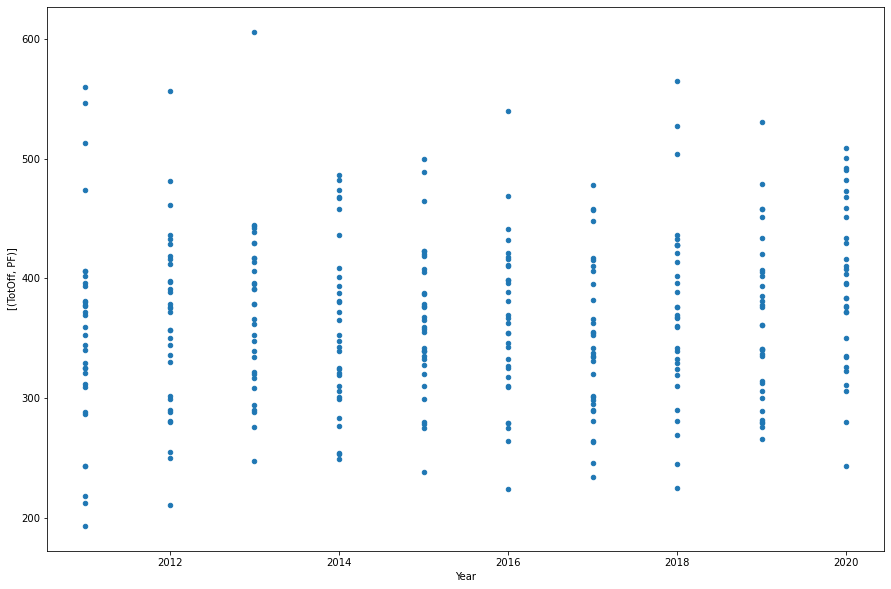

In [277]:
plt.figure(figsize=(10, 10))
#pointsfor = MasterOFF.TotOff.PF
MasterOFF.plot.scatter("Year", [('TotOff','PF')] , figsize=(15, 10))
plt.show()